In [28]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [54]:
# can probs get it down to O(n)
def S_euler(S0, sigma, r, T):
    N = 1000 # num paths
    M = 1000 # how many turns in each path
    dt = T/M
    paths = []

    for i in range(N): # iterating for each path
        S = np.zeros(M+1) # stock path for one of them
        S[0] = S0 # intial stock price is S0

        for n in range(M):
            epsilon = np.random.normal(loc = 0, scale = 1) # sample change from norm dist
            S[n+1] = S[n] + r * S[n] * dt + sigma * S[n] * np.sqrt(dt) * epsilon # plugging each into euler formula

        paths.append(S) # adding the path to the bank
        
    return paths

In [56]:
paths = S_euler(100, 0.25, 0.07, 1)

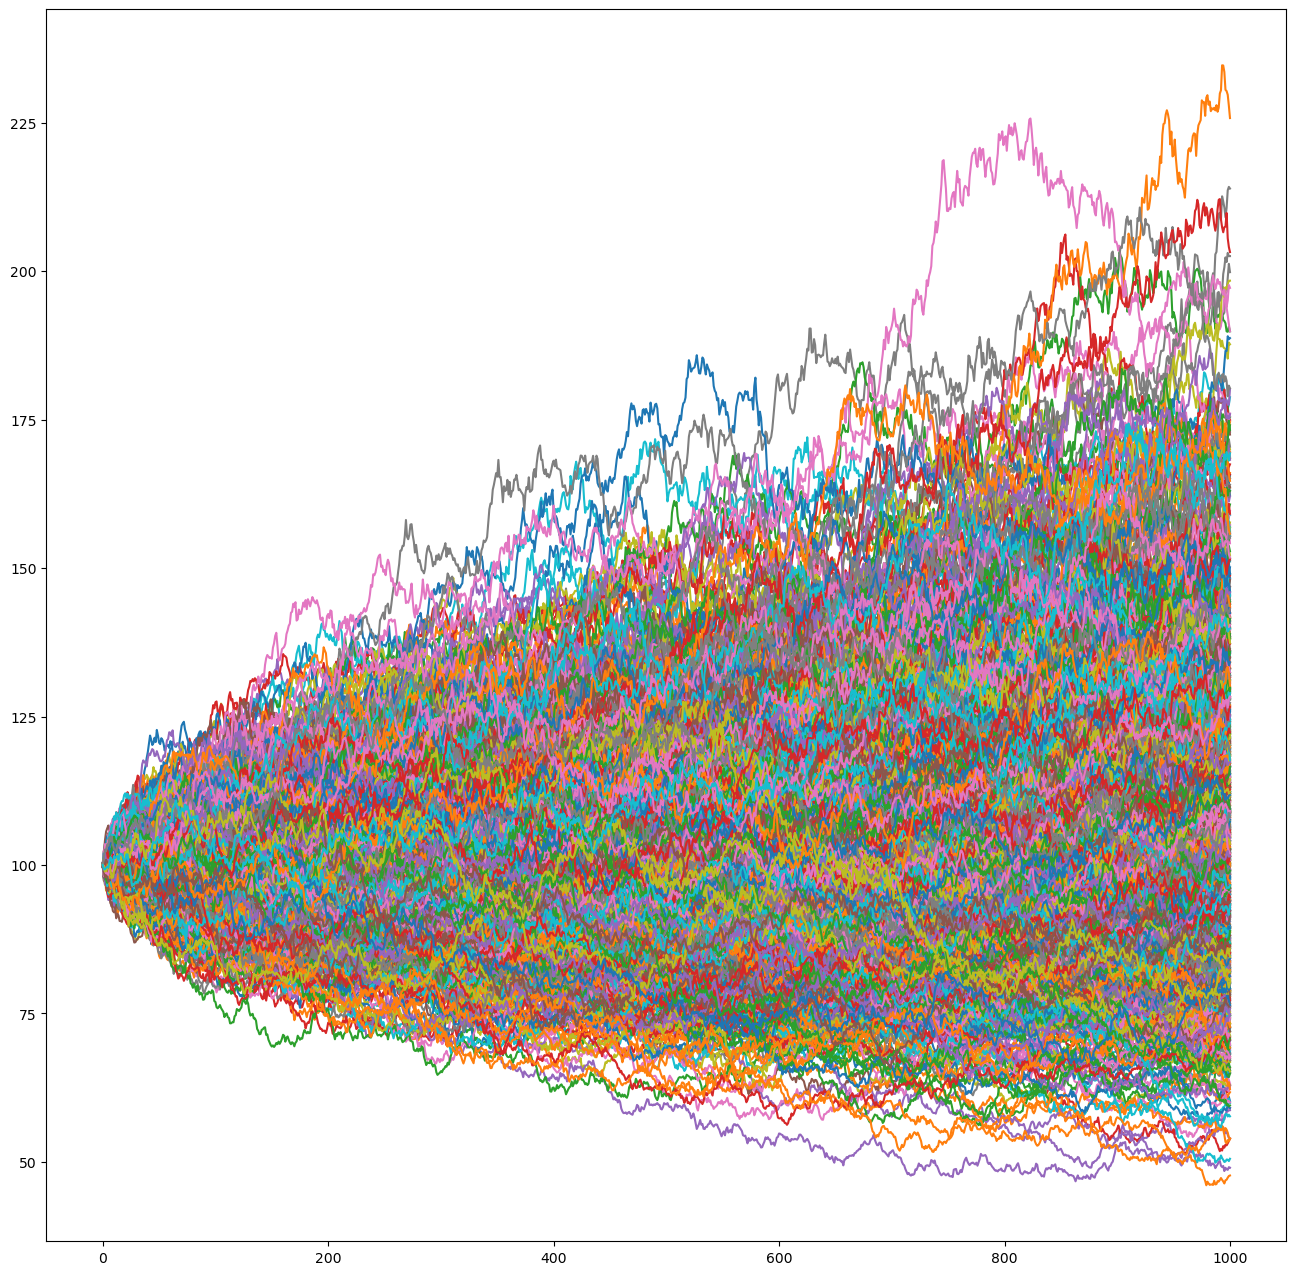

In [58]:
fig, ax = subplots(figsize = (16, 16))
for i in range(len(paths)): # just plotting everything
    ax.plot(paths[i])
# ye looks good

In [100]:
# pricing option now
def eu_option(S0, sigma, r, T, K):
    paths = S_euler(S0, sigma, r, T) # plugging to get stock paths
    S_T = [] # final prices at exercise date
    for i in range(len(paths)):
        S_T.append(paths[i][-1])

    payoff = [] # payoffs for each S_T
    for i in range(len(S_T)):
        payoff.append(max(0, K - S_T[i])) # taking the max between 0 or payoff

    ev_payoff = np.mean(payoff) # ave of payoffs
    price = np.e ** (-r * T) * ev_payoff # plugging into black-scholes
    return price

In [102]:
eu_option(100, 0.25, 0.07, 1, 100)

13.025934941299953